<a href="https://colab.research.google.com/github/SushmitalKhan/Dissertation/blob/main/sankey_n_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.graph_objects as go

In [ ]:
# Load CSV
df = pd.read_csv("/Users/sushmitakhan/Desktop/user_data_extended_v8.csv")

In [ ]:
df['category'].unique()

array(['Health & Fitness', 'Gardening', 'Home Decor',
       'Education & Research', 'Data Privacy', 'Travel',
       'Education & Local Culture', 'Cooking',
       'Entertainment & Pop Culture', 'Academic Research',
       'Home & Garden', 'Home Decor & Design', 'Academia', 'Education',
       'Beauty'], dtype=object)

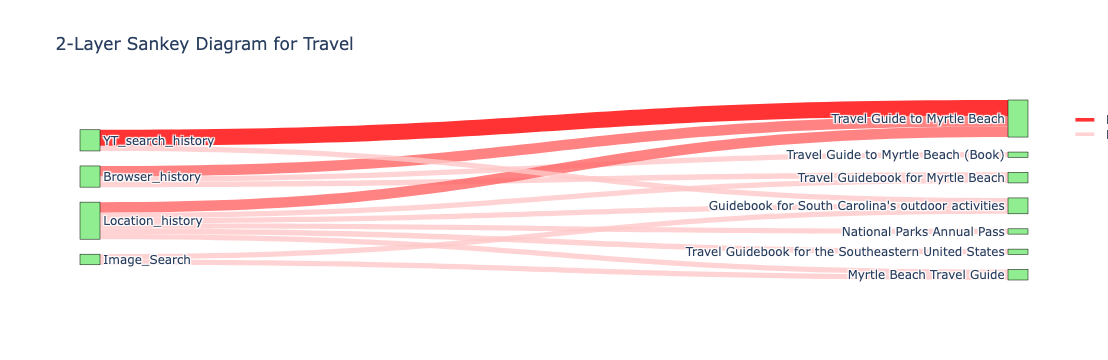

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter by category
selected_category = "Travel"
filtered_df = df[df['category'] == selected_category]

# Create links: source → target
sankey_links = []

for _, row in filtered_df.iterrows():
    source = row['combined_col']
    target = row['recommended_product']
    sankey_links.append({'source': source, 'target': target, 'value': 1})

# Convert to DataFrame
sankey_table = pd.DataFrame(sankey_links)

# Aggregate repeated links
sankey_table = sankey_table.groupby(['source', 'target'], as_index=False)['value'].sum()

# Nodes
nodes = pd.concat([sankey_table['source'], sankey_table['target']]).unique()
node_indices = {node: i for i, node in enumerate(nodes)}
sankey_table['source_idx'] = sankey_table['source'].map(node_indices)
sankey_table['target_idx'] = sankey_table['target'].map(node_indices)

# Normalize values for link color
min_val = sankey_table['value'].min()
max_val = sankey_table['value'].max()
norm = (sankey_table['value'] - min_val) / (max_val - min_val + 1e-6)

# Map value to red shades
link_colors = [f'rgba(255, {int(200*(1-v))}, {int(200*(1-v))}, 0.8)' for v in norm]

# Create Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(nodes),
        color="lightgreen"
    ),
    link=dict(
        source=sankey_table['source_idx'],
        target=sankey_table['target_idx'],
        value=sankey_table['value'],
        color=link_colors,
        customdata=sankey_table['value'],
        hovertemplate="Source: %{source.label}<br>Target: %{target.label}<br>Value: %{customdata}<extra></extra>"
    )
))

# Add manual legend for link thickness
legend_x = 1.05  # position right of the chart
legend_y = 0.9
legend_spacing = 0.08

# Example legend: dark red = high value, pale red = low value
fig.add_shape(type="rect", x0=legend_x, x1=legend_x+0.02, y0=legend_y, y1=legend_y-0.02,
              fillcolor='rgba(255,0,0,0.8)', line=dict(color='rgba(0,0,0,0)'))
fig.add_annotation(x=legend_x+0.03, y=legend_y-0.01, text=f"High value", showarrow=False, xanchor='left', yanchor='middle')

fig.add_shape(type="rect", x0=legend_x, x1=legend_x+0.02, y0=legend_y-legend_spacing, y1=legend_y-legend_spacing-0.02,
              fillcolor='rgba(255,200,200,0.8)', line=dict(color='rgba(0,0,0,0)'))
fig.add_annotation(x=legend_x+0.03, y=legend_y-legend_spacing-0.01, text=f"Low value", showarrow=False, xanchor='left', yanchor='middle')

fig.update_layout(
    title_text=f"2-Layer Sankey Diagram for {selected_category}",
    font_size=12
)

fig.show()


In [ ]:
['Health & Fitness', 'Gardening', 'Home Decor',
       'Education & Research', 'Data Privacy', 'Travel',
       'Education & Local Culture', 'Cooking',
       'Entertainment & Pop Culture', 'Academic Research',
       'Home & Garden', 'Home Decor & Design', 'Academia', 'Education',
       'Beauty']

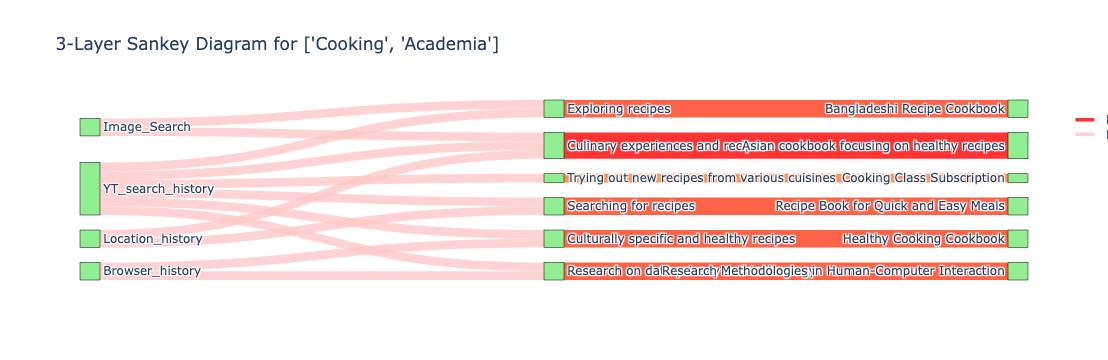

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter by category
selected_category = ['Cooking', 'Academia']
filtered_df = df[df['category'].isin(selected_category)]

# Create 3-layer links: source → activity → target
sankey_links = []

for _, row in filtered_df.iterrows():
    source = row['combined_col']
    activity = row['activity']
    target = row['recommended_product']

    # source → activity
    sankey_links.append({'source': source, 'target': activity, 'value': 1, 'layer': 'source_activity'})
    # activity → target
    sankey_links.append({'source': activity, 'target': target, 'value': 1, 'layer': 'activity_target'})

# Convert to DataFrame
sankey_table = pd.DataFrame(sankey_links)

# Aggregate repeated links
sankey_table = sankey_table.groupby(['source', 'target', 'layer'], as_index=False)['value'].sum()

# Create nodes
nodes = pd.concat([sankey_table['source'], sankey_table['target']]).unique()
node_indices = {node: i for i, node in enumerate(nodes)}
sankey_table['source_idx'] = sankey_table['source'].map(node_indices)
sankey_table['target_idx'] = sankey_table['target'].map(node_indices)

# Normalize values for color intensity
min_val = sankey_table['value'].min()
max_val = sankey_table['value'].max()
norm = (sankey_table['value'] - min_val) / (max_val - min_val + 1e-6)

# Assign link colors based on layer and thickness
link_colors = []
for i, row in sankey_table.iterrows():
    v = norm[i]
    if row['layer'] == 'source_activity':
        # Red shades
        r, g, b = 255, int(200*(1-v)), int(200*(1-v))
    else:
        # Orange-red shades
        r, g, b = 255, int(120*(1-v)), int(50*(1-v))
    link_colors.append(f'rgba({r},{g},{b},0.8)')

# Create Sankey figure
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(nodes),
        color="lightgreen"
    ),
    link=dict(
        source=sankey_table['source_idx'],
        target=sankey_table['target_idx'],
        value=sankey_table['value'],
        color=link_colors,
        customdata=sankey_table['value'],
        hovertemplate="Source: %{source.label}<br>Target: %{target.label}<br>Value: %{customdata}<extra></extra>"
    )
))

# Add legend for thickness
legend_x = 1.05
legend_y = 0.9
legend_spacing = 0.08

# Dark = high value
fig.add_shape(type="rect", x0=legend_x, x1=legend_x+0.02, y0=legend_y, y1=legend_y-0.02,
              fillcolor='rgba(255,0,0,0.8)', line=dict(color='rgba(0,0,0,0)'))
fig.add_annotation(x=legend_x+0.03, y=legend_y-0.01, text="High value", showarrow=False, xanchor='left', yanchor='middle')

# Light = low value
fig.add_shape(type="rect", x0=legend_x, x1=legend_x+0.02, y0=legend_y-legend_spacing, y1=legend_y-legend_spacing-0.02,
              fillcolor='rgba(255,200,200,0.8)', line=dict(color='rgba(0,0,0,0)'))
fig.add_annotation(x=legend_x+0.03, y=legend_y-legend_spacing-0.01, text="Low value", showarrow=False, xanchor='left', yanchor='middle')

fig.update_layout(
    title_text=f"3-Layer Sankey Diagram for {selected_category}",
    font_size=12
)

fig.show()


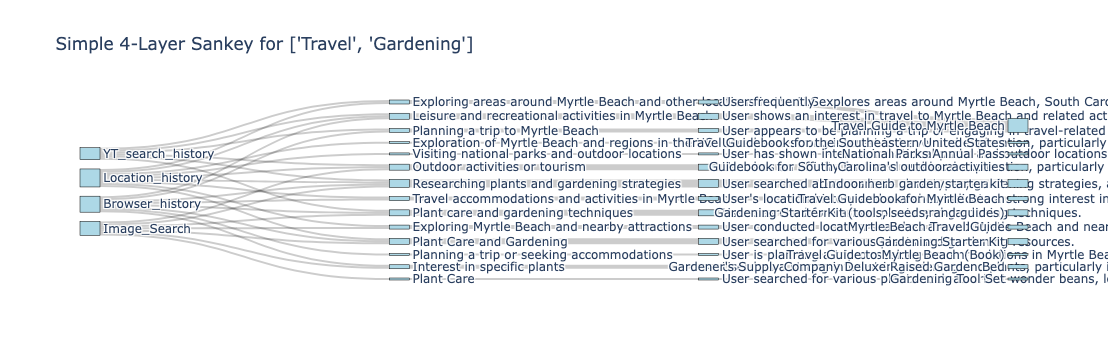

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter by category
selected_category = ["Travel", "Gardening"]
filtered_df = df[df['category'].isin(selected_category)]

# Create links for 4 layers
sankey_links = []
for _, row in filtered_df.iterrows():
    sankey_links.append({'source': row['combined_col'], 'target': row['activity'], 'value': 1})
    sankey_links.append({'source': row['activity'], 'target': row['reason'], 'value': 1})
    sankey_links.append({'source': row['reason'], 'target': row['recommended_product'], 'value': 1})

# Convert to DataFrame and aggregate duplicates
sankey_table = pd.DataFrame(sankey_links)
sankey_table = sankey_table.groupby(['source', 'target'], as_index=False)['value'].sum()

# Create unique node list
nodes = pd.concat([sankey_table['source'], sankey_table['target']]).unique()
node_indices = {node: i for i, node in enumerate(nodes)}

# Map node labels to indices
sankey_table['source_idx'] = sankey_table['source'].map(node_indices)
sankey_table['target_idx'] = sankey_table['target'].map(node_indices)

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(nodes),
        color="lightblue"
    ),
    link=dict(
        source=sankey_table['source_idx'],
        target=sankey_table['target_idx'],
        value=sankey_table['value']
    )
))

fig.update_layout(
    title_text=f"Simple 4-Layer Sankey for {selected_category}",
    font_size=12
)

fig.show()